In [580]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

## Abrindo a base original

In [581]:
file=pd.read_excel('Salary.xlsx')

In [582]:
file

,ï»¿Age,Gender,Education Level,Job Title,Years of Experience,Salary
0,32.0,Male,Bachelor's,Software Engineer,5.0,90000.0
1,28.0,Female,Master's,Data Analyst,3.0,65000.0
2,45.0,Male,PhD,Senior Manager,15.0,150000.0
3,36.0,Female,Bachelor's,Sales Associate,7.0,60000.0
4,52.0,Male,Master's,Director,20.0,200000.0
...,...,...,...,...,...,...
370,35.0,Female,Bachelor's,Senior Marketing Analyst,8.0,85000.0
371,43.0,Male,Master's,Director of Operations,19.0,170000.0
372,29.0,Female,Bachelor's,Junior Project Manager,2.0,40000.0
373,34.0,Male,Bachelor's,Senior Operations Coordinator,7.0,90000.0


# Data-Cleaning

In [583]:
# Data-Cleaning
file=file.rename(columns={'ï»¿Age':'Age'}) 
file=file[file.duplicated()==False]
file=file.dropna()
file


,Age,Gender,Education Level,Job Title,Years of Experience,Salary
0,32.0,Male,Bachelor's,Software Engineer,5.0,90000.0
1,28.0,Female,Master's,Data Analyst,3.0,65000.0
2,45.0,Male,PhD,Senior Manager,15.0,150000.0
3,36.0,Female,Bachelor's,Sales Associate,7.0,60000.0
4,52.0,Male,Master's,Director,20.0,200000.0
...,...,...,...,...,...,...
348,28.0,Female,Bachelor's,Junior Operations Manager,1.0,35000.0
349,36.0,Male,Bachelor's,Senior Business Development Manager,8.0,110000.0
350,44.0,Female,PhD,Senior Data Scientist,16.0,160000.0
351,31.0,Male,Bachelor's,Junior Marketing Coordinator,3.0,55000.0


## Colunas da base que possuem correlação forte com o salário

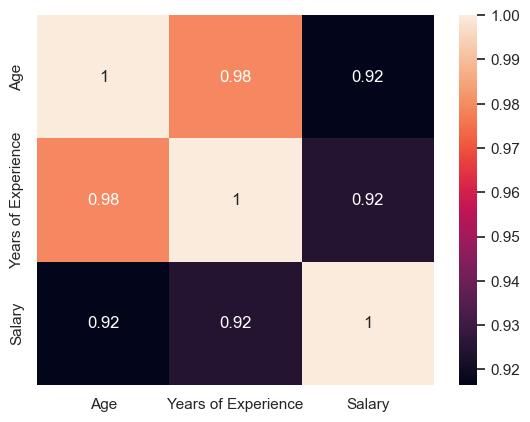

In [584]:
sns.heatmap(file.corr(),annot=True);


## Distribuição do salário por nivel de formação (Homem/Mulher)

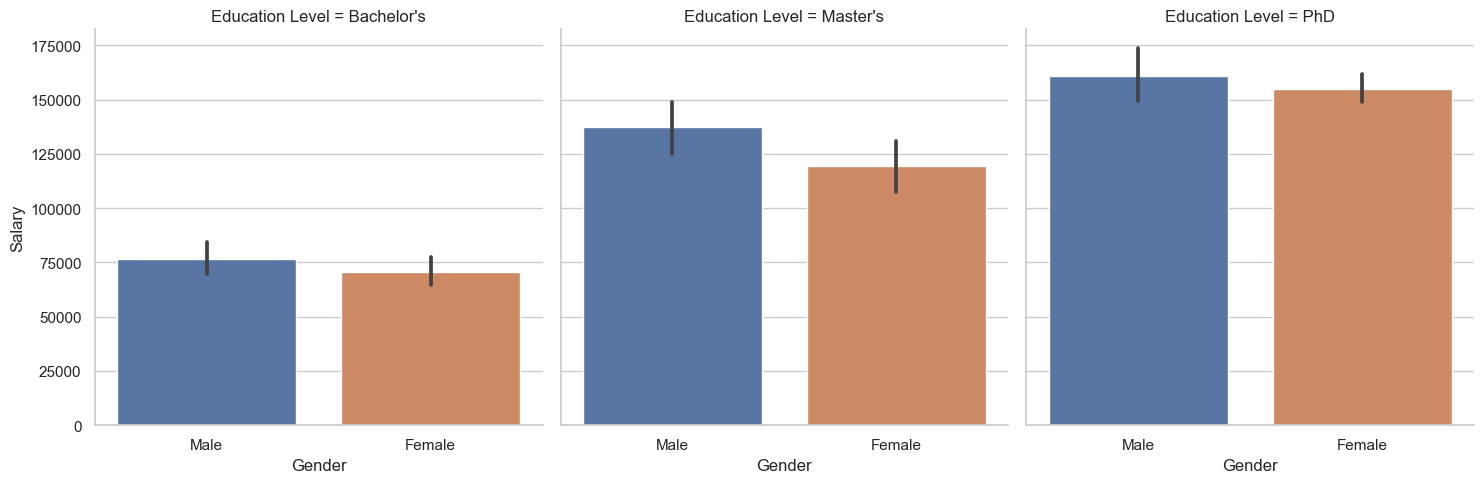

In [585]:
sns.catplot(data=file,x='Gender',y='Salary',col='Education Level',kind='bar');


## Cargos com menores salários/cargos com maiores salários.

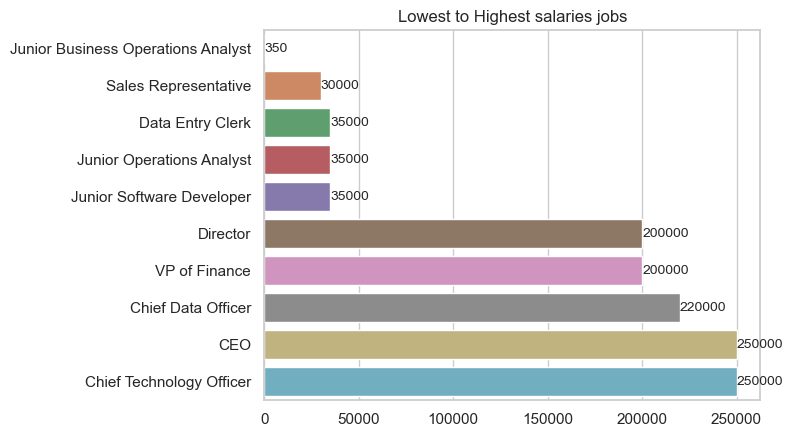

In [586]:
X=list(file.sort_values(by='Salary').head()['Salary'])+list(file.sort_values(by='Salary').tail()['Salary'])
Y=list(file.sort_values(by='Salary').head()['Job Title'])+list(file.sort_values(by='Salary').tail()['Job Title'])
ax=sns.barplot(x=X,y=Y)
ax.bar_label(ax.containers[0], fontsize=10);
ax.set(title='Lowest to Highest salaries jobs');

## Distribuição de salário de acordo com nível do cargo.

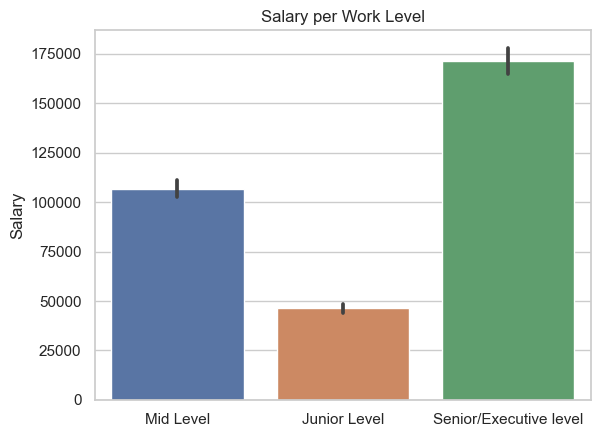

In [587]:
level_list=[]

for value in file['Years of Experience']:
    if value>=0 and value <5:
        level_list.append('Junior Level')
    elif value>=5 and value <=18:
        level_list.append('Mid Level')
    elif value>18 and value<=25:
        level_list.append('Senior/Executive level')
    else:
        level_list.append("No Rate")
        
df_list=pd.DataFrame(level_list)

file=file.assign(Work_Level=level_list)
sns.barplot(x=file['Work_Level'],y=file['Salary']);
plt.title('Salary per Work Level')
plt.xlabel('');

# Nível de formação para cada tipo de cargo ocupado

In [588]:
EW=file.groupby(['Education Level','Work_Level'])['Work_Level'].count()
EW

Education Level  Work_Level            
Bachelor's       Junior Level              83
                 Mid Level                 99
                 Senior/Executive level     9
Master's         Junior Level               8
                 Mid Level                 53
                 Senior/Executive level    30
PhD              Mid Level                 30
                 Senior/Executive level    12
Name: Work_Level, dtype: int64

## Bacharel

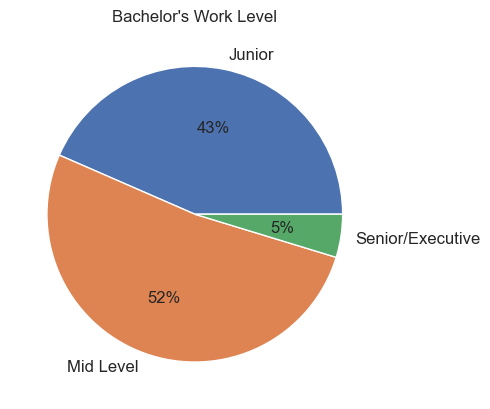

In [589]:
ax1=plt.pie(EW["Bachelor's"],labels=["Junior",'Mid Level','Senior/Executive'],autopct='%.0f%%', textprops={'fontsize':12});
plt.title("Bachelor's Work Level");

## Mestre

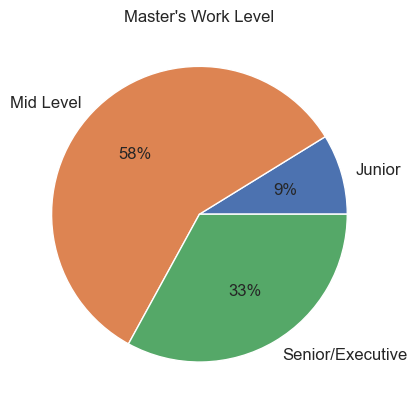

In [590]:
ax2=plt.pie(EW["Master's"],labels=["Junior",'Mid Level','Senior/Executive'],autopct='%.0f%%', textprops={'fontsize':12})
plt.title("Master's Work Level");

## Doutor

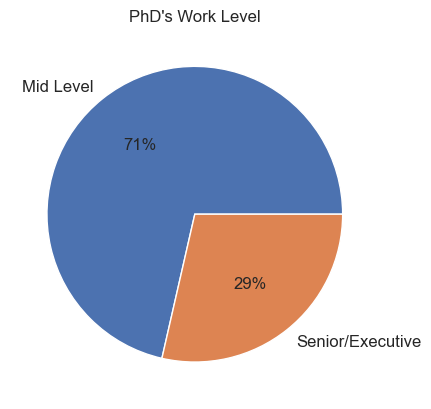

In [591]:
EW["PhD"]
ax3=plt.pie(EW["PhD"],labels=["Mid Level",'Senior/Executive'],autopct='%.0f%%', textprops={'fontsize':12})
plt.title("PhD's Work Level");